# Puzzles of the Milky Way
### by Iryna Kushniruk

Hi! I am a second year PhD student in Astronomy and I study current structure, formation and evolution of the Mily Way. So, of course, my project will be about our home Galaxy. Here comes more information what we will do in this Jupyter notebook.

Studies of the origin and evolution of the Milky Way is an active subject nowadays. There are different ways to gain the information about our Galaxy. We focus on stars that have similar kinematic properties, i.e. structures and overdensities in velocity space. It was confirmed in a number of works that a velocity distribution of nearby stars is inhomogeneous (e.g.: [Degnen 1998](http://iopscience.iop.org/article/10.1086/300364/pdf), [Antoja et al. 2012](https://academic.oup.com/mnrasl/article-pdf/426/1/L1/3104166/426-1-L1.pdf)). It means that these stars are located all around the sky (are graviationally unbound), but something forces them to move in one direction with almost equal velocities, so that they form clumps in the velocity space.

#### Qustion: WHY?

A question of the origin of kinematic overdensities has been raised in a number of works
(e.g.:
[Famaey et al. 2005](https://www.aanda.org/articles/aa/pdf/2005/04/aa1272.pdf), [Bensby et al. 2007](http://iopscience.iop.org/article/10.1086/512014/pdf)), and recent findings prove that stellar streams retain repercussions of various dynamical processes of the Milky Way.

#### Three main theories to explain kinematic structures:
- Evaporated open clusters (moving groups). It means that stars once were a real, spacial overdensity called [open cluster](https://www.cfa.harvard.edu/research/oir/open-clusters). Then, through its evolution it became a disrupted cluster, whare stars are no more gravitationally bound. Such groups are called moving groups where stars share similar ages and chemical composition.  
- Dynamical resonances within the Milky Way (e.g.: from Galactic bar or spiral arms). In this case stellar parameters like ages and chemical composition can be completely different. Only orbital velocity should be the one to resonance with large-scale structures. 
- Remnants of accreted satellite galaxies (mergers). We know that the Milky Way has donzens of satellites, smaller galaxies. They all graviationally interact with each other. Some stars from satellite galaxies could migrate to the Milky Way as a result of tidal interaction. These stars usually have a unique chemical composition and kinematic properties. 

A few month ago we published our first paper ([Kushniruk et al. 2017](https://www.aanda.org/articles/aa/pdf/2017/12/aa31147-17.pdf)) where we found 19 kinematic structures in the Solar neighbourhood (region about 500 pc around the Sun) using the most up-to-date and precise astrometric measurements for more than 200 000 stars by cross-matching the first astrometric data from the Gaia DR1 ([Lindegren et al. 2016](https://www.aanda.org/articles/aa/pdf/2016/11/aa28714-16.pdf)) and the radial velocities from the RAVE DR5 catalogue ([Kunder et al. 2016](http://iopscience.iop.org/article/10.3847/1538-3881/153/2/75/pdf)).

In this project we are going to further investigate kinematic structures found in our paper. Now we would like to investigate what is the distribution of such parameters as ages and anundances in each group and will look at the general distribution of effective temperature ($T_{eff}$) and surface gravity ($\log g$) for the total sample. This will allow us to, at least roughly, judge on one of the possible origin for each group. 

If you like, you can scroll the pdf below for more details. This is our paper that is related to the project and we are going to talk about groups from Fig.7. Numbers in each plot correspond to names in the table (the same figure). We will also repeat some steps neened to get the distribution as in Fig.7, but slightly simplified as we are not allowed to share some parts of our project. 

In [1]:
from IPython.display import IFrame 
IFrame("https://www.aanda.org/articles/aa/pdf/2017/12/aa31147-17.pdf", width=600, height=300)

#### Plans:
Part 1
- Read total sample file that is a crossmatched TGAS and RAVE catalogues
- Read the file that contains selection criteia for the data
- Cut the total sample according to selection criteria
- Make a contour plot where each star is presented as a Gaussian
- Smooth the previous plot and then compute the difference: contour minus countour_smoothed to get kinematic structures
- Plot [Hertzsprung–Russell diagram](https://sv.wikipedia.org/wiki/Hertzsprung–Russell-diagram) to see evolution stage of each star in the total sample

As a result we can get something similar to the Fig.7 but simpler. Unfortunately I am not allowed to share wavelet transform part of the code.

Part 2
- Load files generated by another program that performs wavelet transform. Those files contain information about stars that belong to kinematic structures
- Make different varieties of plots for each group and the total sample

#### How to run this notebook?
It is enough to use conda environment that was installed for the COMPUTE course. We will use numpy, pandas, scipy and matplotlib packages here. All data files are in the directory **data_storage**. All figures will be saved to directory **figures_storage**.

#### Step 1: Load packages needed:
All packages were mentioned in the lectures

In [2]:
%matplotlib inline    
import numpy  as np   
import pandas as pd

import scipy.stats   as st
from   scipy.ndimage import gaussian_filter  

import matplotlib
from   matplotlib      import pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm   as cm                 

#### Step 2: Loading data
We will load data with pandas and then read columns we need as np.arrays.
Our data file contains a lot of different parameters, but we are interested in the following:

- [space velocity](https://en.wikipedia.org/wiki/Stellar_kinematics#Space_velocity) components U and V for each star
![](https://www.handprint.com/ASTRO/IMG/coord5.gif)

- [equatorial coordinates](http://astro.unl.edu/naap/motion1/cec_units.html) RA and DEC (Right ascension $\alpha$ and declination $\delta$)$\,$ of each star
![](http://www.jtwastronomy.com/tutorials/images/celestial_coordinates.png)

- magnesium abundance of each star 
- iron abundance of each star
- age of each star
- effective temperature $T_{eff}$
- logarithm of the surface gravity $\log g$

Our wavelet code returns two files. One file contains info about all stars that belong to kinematic structures. The second one is divided by groups. Assuming we have 8 stellar parameters (age, temperature etc) then 8 first columns should be associated with the group 1, 8 next column are for group 2 etc.

First we load our data file with pandas according to the formating, then we specify which columns we need with iloc and stansform into np.arrays with .values method

#### Load TGAS+RAVE catalogue

In [3]:
data_obs = pd.read_csv("data/median_without_duplicates_30_Jun.txt", header=0, comment='#') #data frame
pd.set_option('display.max_columns', 60) #allow to show more columns in the cell 
data_obs.head()                          # show data frame

,tycho2_id,RA,DE,X,Y,Z,U,V,W,d,par,Gpar,G_U,G_V,G_W,rad_vel,G_rad_vel,Mg,Fe,mu_al,mu_de,G_mu_al,G_mu_de,Teff,eTeff,logg,elogg,age,age_err,vmag,eMet_K,CHISQ_c,SNR
0,5498-889-1,159.1596,-13.4735,-0.0232,-0.1293,0.1021,4.6331,-15.3374,1.4585,0.1663,6.0116,0.4196,1.1090,0.7783,0.8782,12.166,0.690,0.03,-0.35,1.1573,-13.2996,1.4922,0.5762,5896.40,57.0,3.75,0.08,5.920260e+09,1.852680e+09,10.028,0.09,1298.6,110.0
1,5495-445-1,160.1524,-11.3478,-0.1161,-0.6014,0.5163,-27.9419,-29.0310,6.5470,0.8011,1.2483,0.5454,12.3636,3.8505,6.9820,30.064,0.728,-0.01,-0.16,-7.2692,0.1973,2.0981,0.6910,4867.20,51.0,2.50,0.10,7.199520e+09,3.651080e+09,11.095,0.09,1142.6,79.0
2,5498-603-1,158.5359,-12.9130,-0.0628,-0.3161,0.2511,15.0650,-25.5202,-13.6693,0.4086,2.4476,0.4938,4.5275,3.9532,4.3747,9.033,0.850,0.36,0.24,-0.1354,-16.1914,1.8647,0.6247,6066.30,54.0,3.96,0.11,2.142950e+09,5.059260e+08,10.784,0.10,1156.0,84.0
3,5495-1200-1,160.4323,-12.2305,-0.0540,-0.3084,0.2591,-37.3269,-32.1343,-18.6639,0.4064,2.4607,0.4773,7.3207,3.8903,6.0489,17.445,0.767,-0.31,-0.40,-25.1570,-5.7143,1.6215,0.7411,4962.95,55.0,3.21,0.12,4.326580e+09,2.805870e+09,10.210,0.08,1258.3,96.0
4,5495-886-1,159.0945,-12.3785,-0.0154,-0.0784,0.0640,-21.6057,4.5227,-19.8857,0.1024,9.7693,0.4434,1.2484,0.8628,0.9383,-12.637,1.010,-0.05,-0.23,-55.2432,4.3368,1.4545,0.8638,5486.90,57.0,3.94,0.08,7.969690e+09,3.334950e+09,10.049,0.09,1101.8,101.0


Some stars can have high uncertainties of some parameters. We have to apply some cuts to get better results in the eand. This file is our input file for the wavelet code. Just for fun we can read this file in another way, not with pandas.

In [4]:
# read parameters for sample selection
file_namein        = "data/part_0_parameters.txt"
data               = np.loadtxt(file_namein)

# Selection of range of U and V and number of bins
U_min              = data[0]
U_max              = data[1]
V_min              = data[2]
V_max              = data[3]

# Limits on input parameters
Sigma_U_max        = data[6]
Sigma_V_max        = data[7]
Sigma_W_max        = data[8]
Sigma_par_par      = data[9]

After all cuts are read from the file we can apply it to the original data. data_obs in the end will contain smaller but more accurate stellar sample.

In [5]:
# Selection of data with good accuracy
# Limits on Sigma_U, Sigma_V and Sigma_W
data_obs = data_obs[data_obs.G_U < Sigma_U_max]
data_obs = data_obs[data_obs.G_V < Sigma_V_max]
data_obs = data_obs[data_obs.G_W < Sigma_W_max]

# Limit on precision of parallax
data_obs = data_obs[(data_obs.par/data_obs.Gpar) < Sigma_par_par]

##### S/N ratio ##########
data_obs = data_obs[data_obs.SNR > 40]  #leave those where Signal to Noise ration is > 40

Great! Now we have a better sample. Time to read columns we need for plots. We will save them to np.array with .values method

In [6]:
U_obs = data_obs['U'].values   #U velocity array
V_obs = data_obs['V'].values   #V velocity array

Gu = data_obs['G_U'].values    #Gu velocity uncertainty array
Gv = data_obs['G_V'].values    #Gv velocity uncertainty array

Teff = data_obs['Teff'].values #Teff effective temperature array
logg = data_obs['logg'].values #logg logarithm surface gravity array

#### Step 3: Grid preparation
Now we need to know max and min values of U and V taking into account velocity uncertainties. It is needed to make a countour plot. Where every star will be represented as a Gaussian with sigmas Gu and Gv and mu U and V.

In [7]:
ind_u = np.where(U_obs == np.min(U_obs))   #returns tuple with an index where U_obs value is min
ind_u = list(ind_u)                        #convert to list
ind_u = np.asarray(ind_u)                  #convert to np.array
ind_u = ind_u.flatten()                    #decrease dimensionality of an array

ind_v = np.where(V_obs == np.min(V_obs))   #similar......
ind_v = list(ind_v)
ind_v = np.asarray(ind_v)
ind_v = ind_v.flatten()

ind_U = np.where(U_obs == np.max(U_obs))
ind_U = list(ind_U)
ind_U = np.asarray(ind_U)
ind_U = ind_U.flatten()

ind_V = np.where(V_obs == np.max(V_obs))
ind_V = list(ind_V)
ind_V = np.asarray(ind_V)
ind_V = ind_V.flatten()

Now lets make a grid that we will use to compute 2d gaussians and create and array Q where results will be stored

In [8]:
grid = 100

Uu = np.linspace(U_obs[ind_u]-Gu[ind_u], U_obs[ind_U]+Gu[ind_U], grid)
Vv = np.linspace(V_obs[ind_v]-Gv[ind_v], V_obs[ind_V]+Gv[ind_V], grid)

Uuu, Vvv = np.meshgrid(Uu, Vv)
Q = np.zeros((grid,grid))

#### Step 4: gaussians computation
We use bivariate_normal method to compute gaussian distribution of every star. Then we add previous matrix to the new one to get general distribution

In [9]:
length = len(Gu)
print('We have to wait a bit...Wait till', length)

for i in range(length):

      Q = Q + mlab.bivariate_normal(Uuu, Vvv, Gu[i], Gv[i], U_obs[i], V_obs[i])
      if i % 10000 == 0:
           print(i)
print('Done!')            

We have to wait a bit...Wait till 67018
0
10000
20000
30000
40000
50000
60000
Done!


#### Step 5: Smooth distribution and subtract it from the main one. Make contour plot

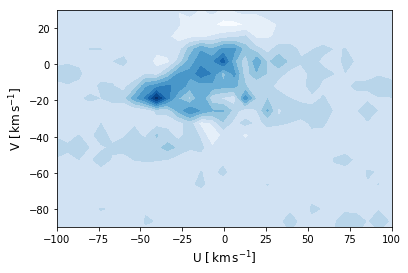

In [10]:
Q_smoothed = gaussian_filter(Q, sigma=1.5)
Q_dif      = Q - Q_smoothed

fig=plt.figure()
ax = fig.add_subplot(111)

my_cmap = matplotlib.cm.get_cmap('Blues')
norm = matplotlib.colors.Normalize(vmin=np.min(Q_dif), vmax=np.max(Q_dif))
CF = ax.contourf(Uuu, Vvv, Q_dif, 10, cmap=my_cmap, vmin=np.min(Q_dif), norm=norm, alpha=1)
ax.set_xlabel(r'U [${\rm\,km\,s^{-1}}$]', fontsize=12)
ax.set_ylabel(r'V [${\rm\,km\,s^{-1}}$]', fontsize=12)
ax.set_xlim(-100,100)
ax.set_ylim(-90,30)
plt.savefig("UV_distribution.pdf")

Explanation: What we see in the plot above is a simplified version of Fig.7 in [Kushniruk et al. 2017](https://www.aanda.org/articles/aa/pdf/2017/12/aa31147-17.pdf). Countours show kinematic structures found. 

Now we are interested in Hertzsprung Russell diagram for the total sample. This will allow us to see on which evolution stage our stars are.

#### Step 5: Hertzsprung Russell diagram
We will show it as a scatter plot

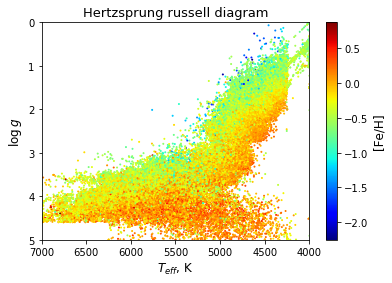

In [11]:
fig, ax = plt.subplots()
ax = fig.gca()
artist = ax.scatter(x=data_obs['Teff'], y=data_obs['logg'], c=data_obs['Fe'], s=1, marker = 'o', cmap = cm.jet)
cbar = fig.colorbar(artist)
ax.set_ylim(5,0)
ax.set_xlim(7000,4000) 
ax.set_title('Hertzsprung russell diagram', fontsize=13)  
ax.set_xlabel(r'$T_{eff}$, K', fontsize=12)
ax.set_ylabel(r'$\log\,g$', fontsize=12)
cbar.set_label('[Fe/H]', fontsize=12)
plt.savefig("HR_diagram.pdf")

## Part 2

#### Step 1: Read data files generated by wavelet transform code

Now we will read files which contain information about stars that actually are a part of kinematic structures. Will use pandas for that and save columns needed as np.arrays. The file we load below contains info about ALL stars. We do not know which group does each star belong to.

In [12]:
data_structures_stars = pd.read_csv('data/stars_structures_j3_all_x.txt', header=None, comment='#') ### read it to get parameters of each structure

UU       = (data_structures_stars.iloc[:,0]).values       #read U velocity as np.array
VV       = (data_structures_stars.iloc[:,1]).values       #read V velocity as np.array
RAA      = (data_structures_stars.iloc[:,2]).values       #read RAA (coordinate) as np.array
DEE      = (data_structures_stars.iloc[:,3]).values       #read DEE (coordinate) as np.array
Mgg      = (data_structures_stars.iloc[:,4]).values       #read Mgg (Mg abundace) as np.array
Fee      = (data_structures_stars.iloc[:,5]).values       #read Fee (Fe abundace) as np.array
agee     = (data_structures_stars.iloc[:,6]).values       #load stellar ages in giga years + conversion factor

Now we have to read file where stars associated with each kinemcatic groups are saved in the more structured way. We know that the file has 152 columns and every new structure starts in every $+8$ column. For this purpose we will generate a list called myrange to easier read data from file. We also need an ordinary index k and num is a list that contains indexes of the structures. Wavelet code enumerate structures in its own order. We need to chage the numbers as it was in the paper. It is necessary for the comparison of results.

In [13]:
myrange = np.arange(0,152,8)
myrange = list(myrange)

k = 0
num =  [18,14,19,17,10,11,8,9,7,15,4,5,6,16,1,2,12,13,3]

data_groups = pd.read_csv('data/stars_per_structure_j3_all.txt', header=None, comment='#') # read it to get (U,V)stars

#### Step 2:  Make figures for the total sample and for each group
Here we will make 3 plots in a loop and save them to pdf. We will read data from the file first. Structures have different number of stars and sometimes column can have NaN values. We have to remove it with np.isnan method. Then we just make plots.

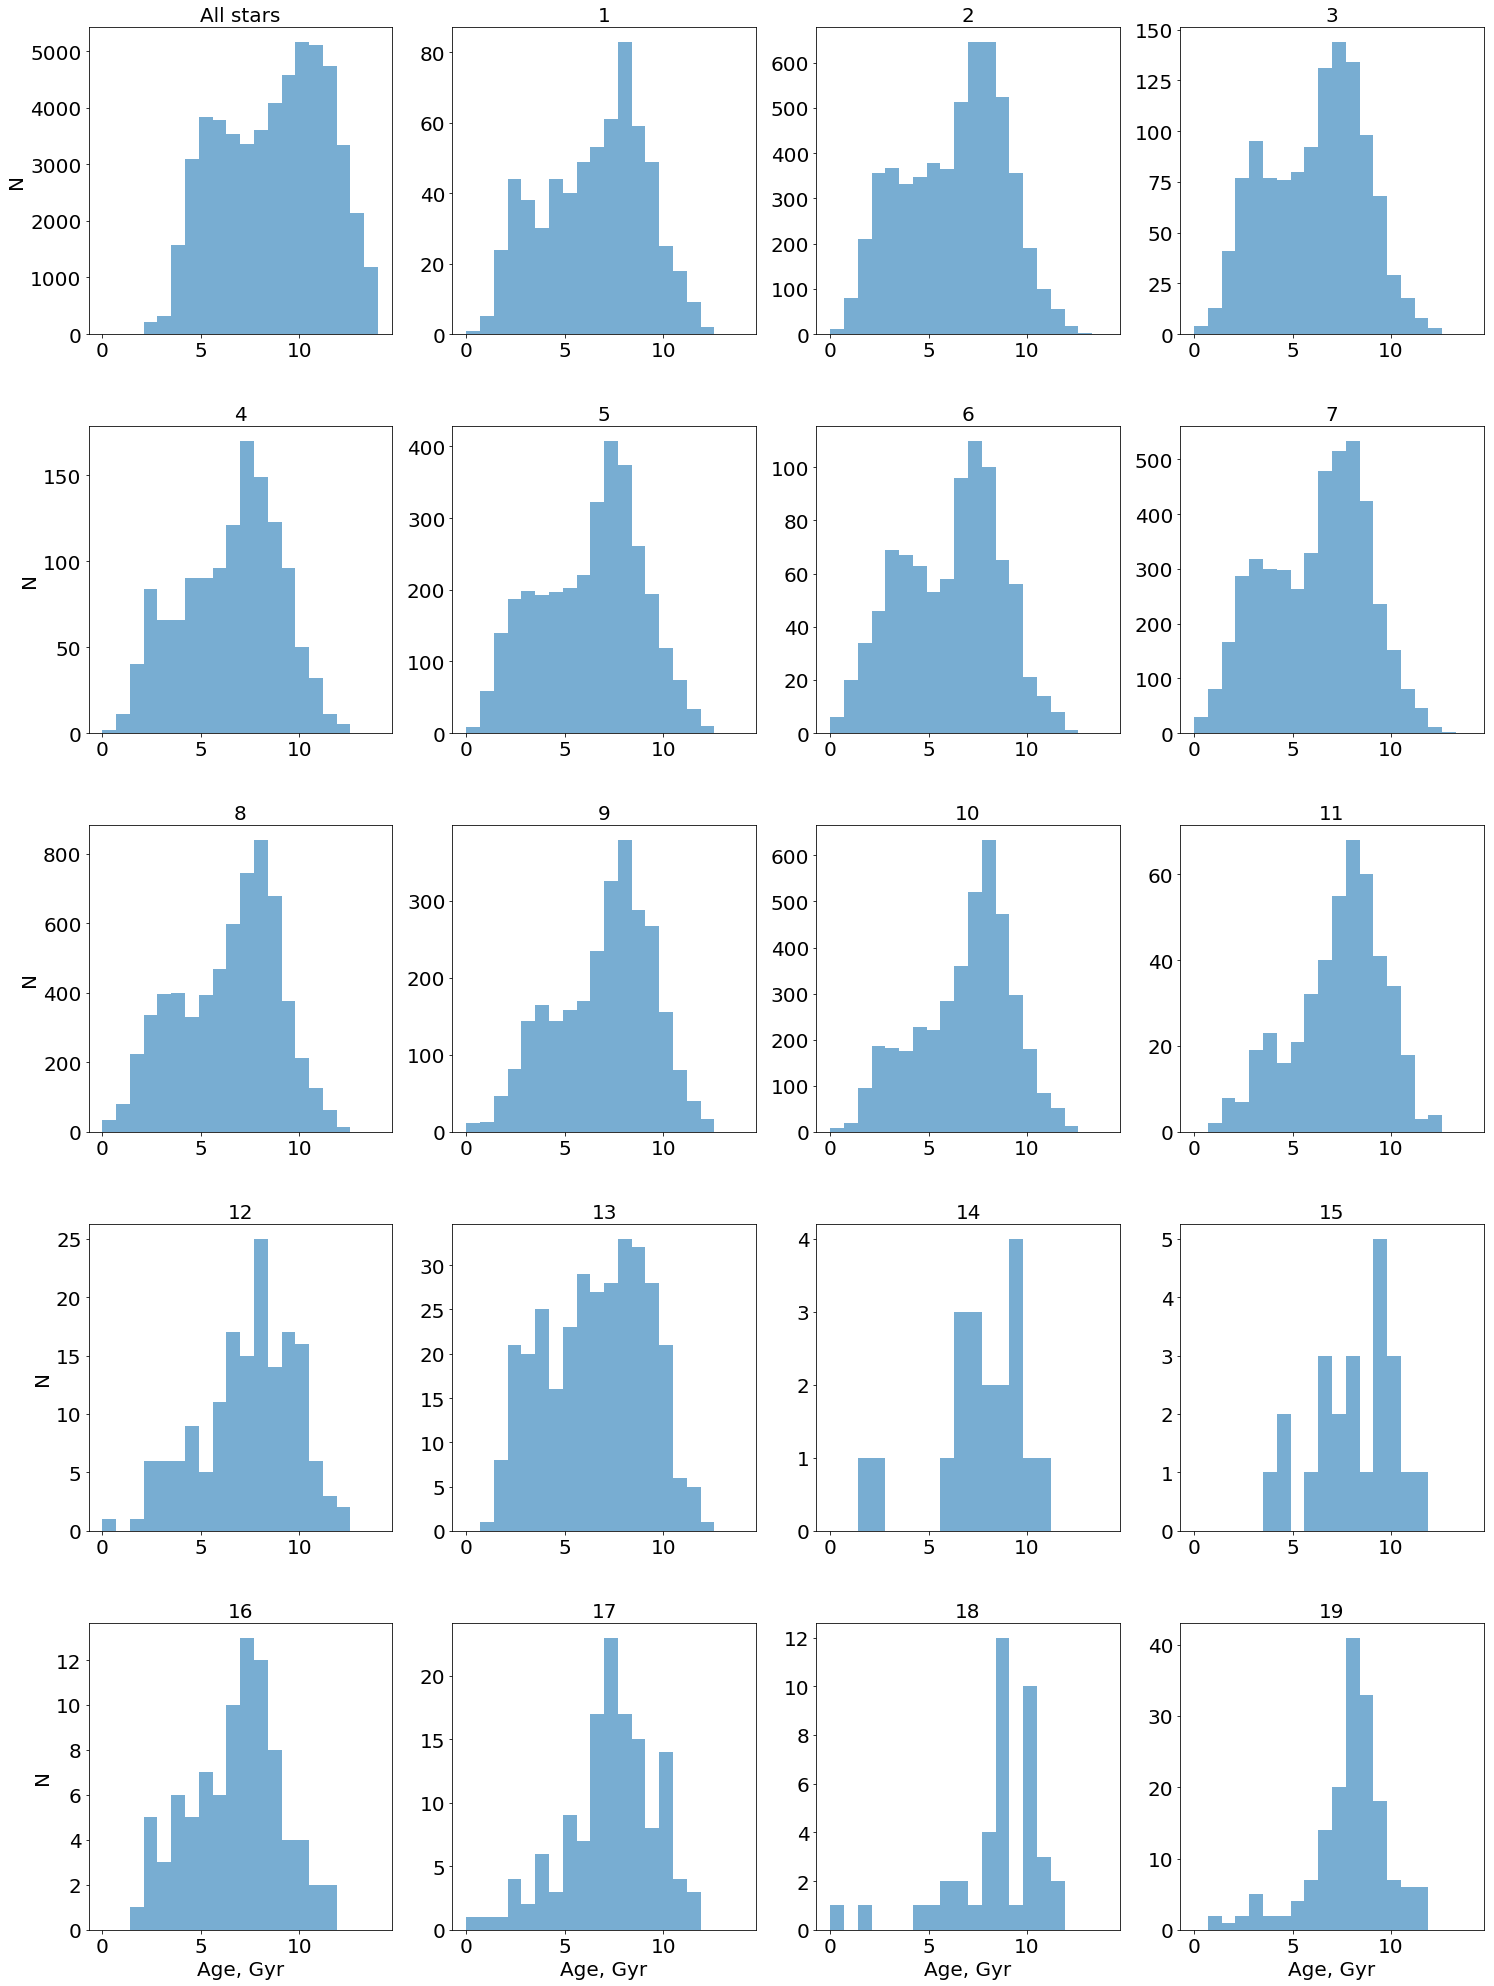

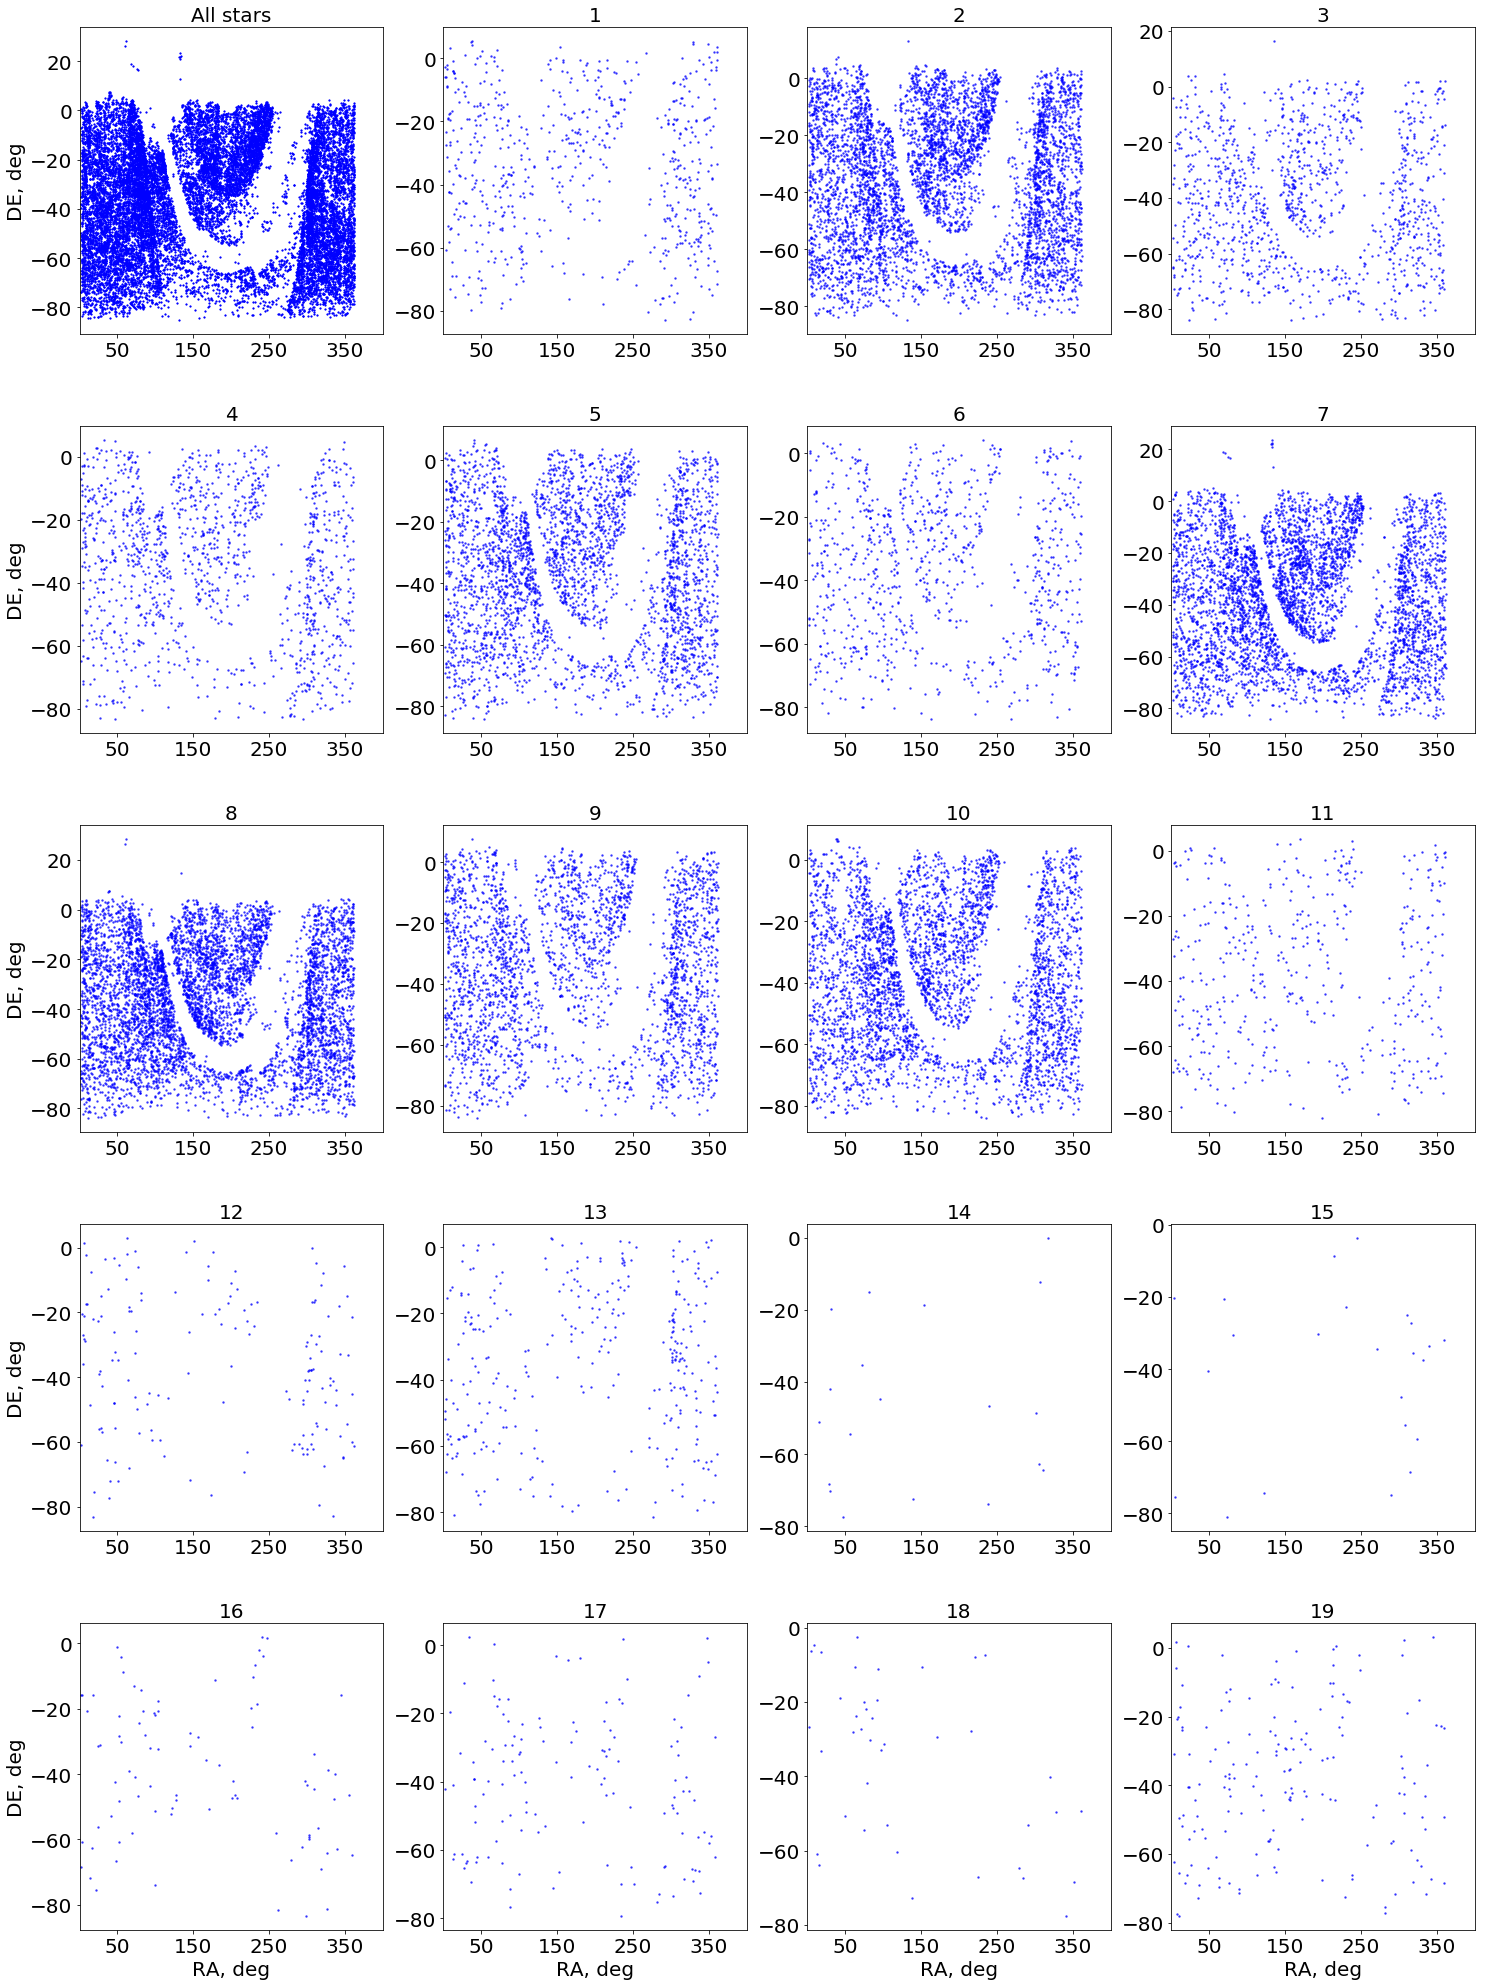

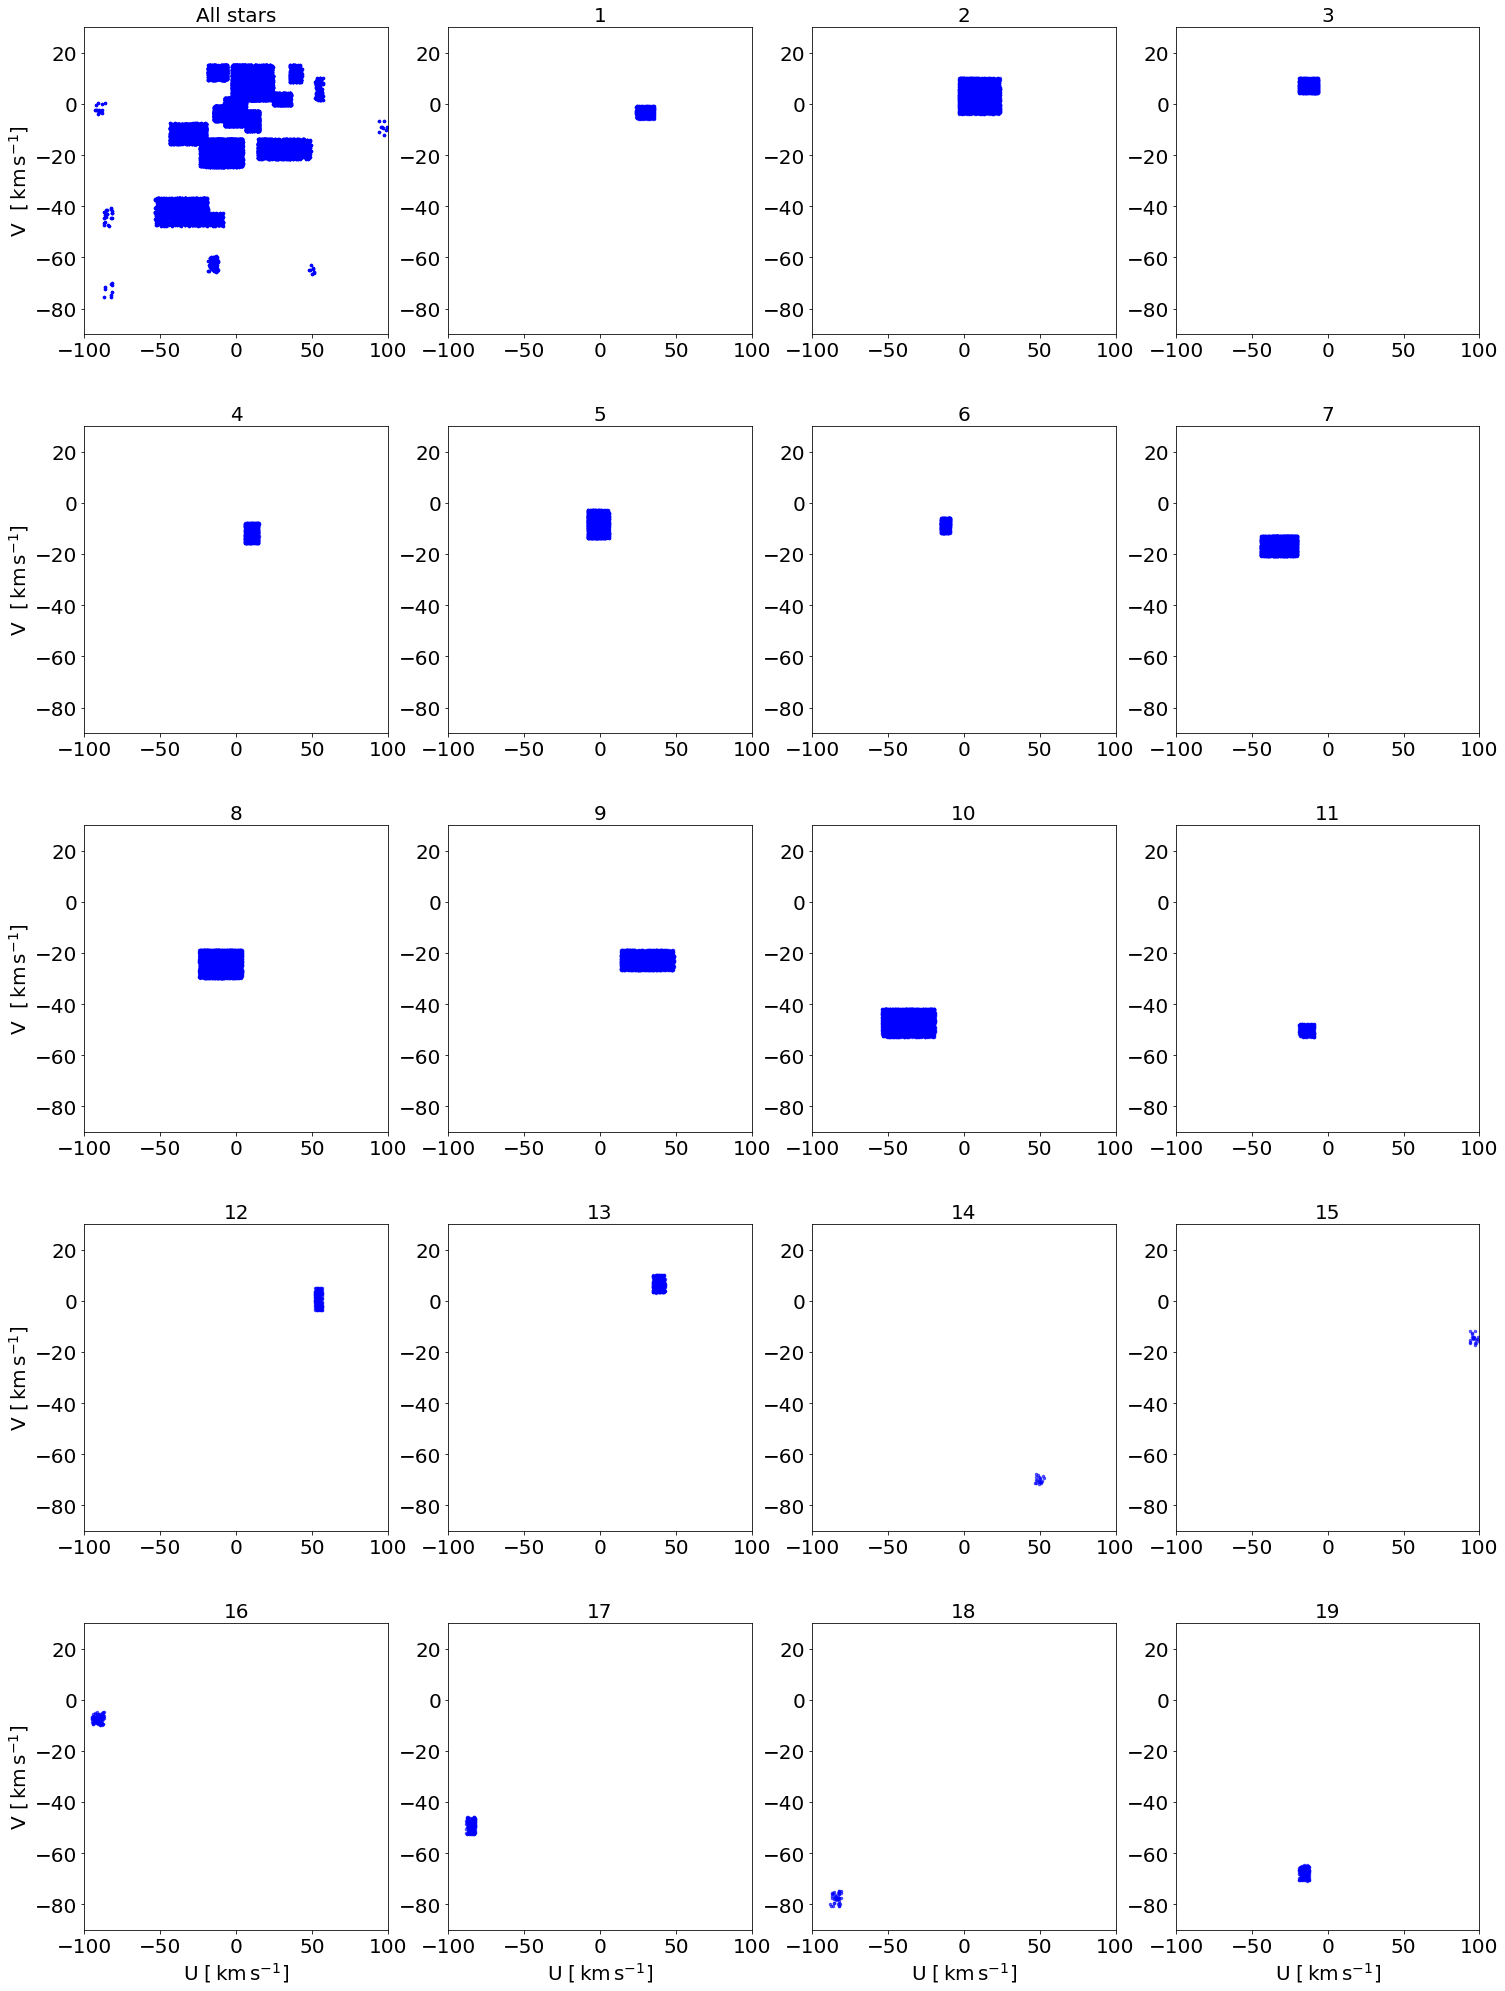

In [14]:
fig, axs = plt.subplots(5,4, figsize=(25, 35), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()

fig2, axs2 = plt.subplots(5,4, figsize=(25, 35), facecolor='w', edgecolor='k')
fig2.subplots_adjust(hspace = .3, wspace=.2)
axs2 = axs2.ravel()

fig3, axs3 = plt.subplots(5,4, figsize=(25, 35), facecolor='w', edgecolor='k')
fig3.subplots_adjust(hspace = .3, wspace=.2)
axs3 = axs3.ravel()

k = 0
for i in list(myrange):
      U       = (data_groups.iloc[:,i+0]).values
      V       = (data_groups.iloc[:,i+1]).values   
      RA      = (data_groups.iloc[:,i+2]).values
      DE      = (data_groups.iloc[:,i+3]).values 
      age     = (data_groups.iloc[:,i+6]).values /1e9
         
      U = U[~np.isnan(U)]
      V = V[~np.isnan(V)]
      RA = RA[~np.isnan(RA)]
      DE = DE[~np.isnan(DE)]
      age = age[~np.isnan(age)]
    
      axs[num[k]].hist(age, bins=20,range=[0,14], alpha=0.6)  
      axs[k+1].set_title(str(k+1), fontsize=20)
      axs[k+1].tick_params(labelsize=20)
    
      axs2[num[k]].plot(RA, DE, '.', color = 'blue',markersize=3, alpha=0.6)  
      axs2[k+1].set_title(str(k+1), fontsize=20)
      axs2[k+1].xaxis.set_ticks([50,150,250,350])  
      axs2[k+1].tick_params(labelsize=20)
      axs2[k+1].set_xlim(0,400) 
         
      axs3[num[k]].plot(U, V, '.', color = 'blue',markersize=5, alpha=0.6)  
      axs3[k+1].tick_params(labelsize=20)
      axs3[k+1].set_title(str(k+1), fontsize=20)
      axs3[k+1].set_xlim(-100,100)
      axs3[k+1].set_ylim(-90,30)  

      k = k + 1
        
##########################################
axs[0].hist(agee, bins=20,range=[0,14], alpha=0.6)  
axs[0].set_title('All stars', fontsize=20)   
axs[0].tick_params(labelsize=20)
        
axs[16].set_xlabel(r'Age, Gyr', fontsize=20)
axs[17].set_xlabel(r'Age, Gyr', fontsize=20)
axs[18].set_xlabel(r'Age, Gyr', fontsize=20)
axs[19].set_xlabel(r'Age, Gyr', fontsize=20)

axs[0].set_ylabel(r'N',  fontsize=20)  
axs[4].set_ylabel(r'N',  fontsize=20) 
axs[8].set_ylabel(r'N',  fontsize=20) 
axs[12].set_ylabel(r'N', fontsize=20) 
axs[16].set_ylabel(r'N', fontsize=20) 

##########################################
axs2[0].plot(RAA, DEE, '.', color = 'blue',markersize=2, alpha=0.6)  
axs2[0].set_title('All stars', fontsize=20) 
axs2[0].xaxis.set_ticks([50,150,250,350]) 
axs2[0].set_xlim(0,400)
axs2[0].tick_params(labelsize=20)
        
axs2[16].set_xlabel(r'RA, deg', fontsize=20)
axs2[17].set_xlabel(r'RA, deg', fontsize=20)
axs2[18].set_xlabel(r'RA, deg', fontsize=20)
axs2[19].set_xlabel(r'RA, deg', fontsize=20)

axs2[0].set_ylabel(r'DE, deg', fontsize =20)  
axs2[4].set_ylabel(r'DE, deg', fontsize =20) 
axs2[8].set_ylabel(r'DE, deg', fontsize =20) 
axs2[12].set_ylabel(r'DE, deg', fontsize=20) 
axs2[16].set_ylabel(r'DE, deg', fontsize=20) 

##########################################
axs3[0].plot(UU, VV, '.', color = 'blue',markersize=5, alpha=0.6)  
axs3[0].set_title('All stars', fontsize=20)  
axs3[0].tick_params(labelsize=20)
axs3[0].set_xlim(-100,100)
axs3[0].set_ylim(-90,30)

ax.set_ylabel(r'V ', fontsize=12)
        
axs3[16].set_xlabel(r'U [${\rm\,km\,s^{-1}}$]', fontsize=20)
axs3[17].set_xlabel(r'U [${\rm\,km\,s^{-1}}$]', fontsize=20)
axs3[18].set_xlabel(r'U [${\rm\,km\,s^{-1}}$]', fontsize=20)
axs3[19].set_xlabel(r'U [${\rm\,km\,s^{-1}}$]', fontsize=20)

axs3[0].set_ylabel(r'V  [${\rm\,km\,s^{-1}}$]', fontsize=20)  
axs3[4].set_ylabel(r'V  [${\rm\,km\,s^{-1}}$]', fontsize=20) 
axs3[8].set_ylabel(r'V  [${\rm\,km\,s^{-1}}$]', fontsize=20) 
axs3[12].set_ylabel(r'V [${\rm\,km\,s^{-1}}$]', fontsize=20) 
axs3[16].set_ylabel(r'V [${\rm\,km\,s^{-1}}$]', fontsize=20) 

fig.savefig("Ages.pdf") 
fig2.savefig("RA_DE.pdf") 
fig3.savefig("U_V.pdf") 

We can perform a Kernel density estimate (kernel is gaussian) to check if there is more than one peak in abundance-age distribution. Blue line in each plot shows separation betweem [thin](https://en.wikipedia.org/wiki/Thin_disk) and [thick disks](https://en.wikipedia.org/wiki/Thick_disk). Numbers on each plot are the same as in Fig.7 from the paper.

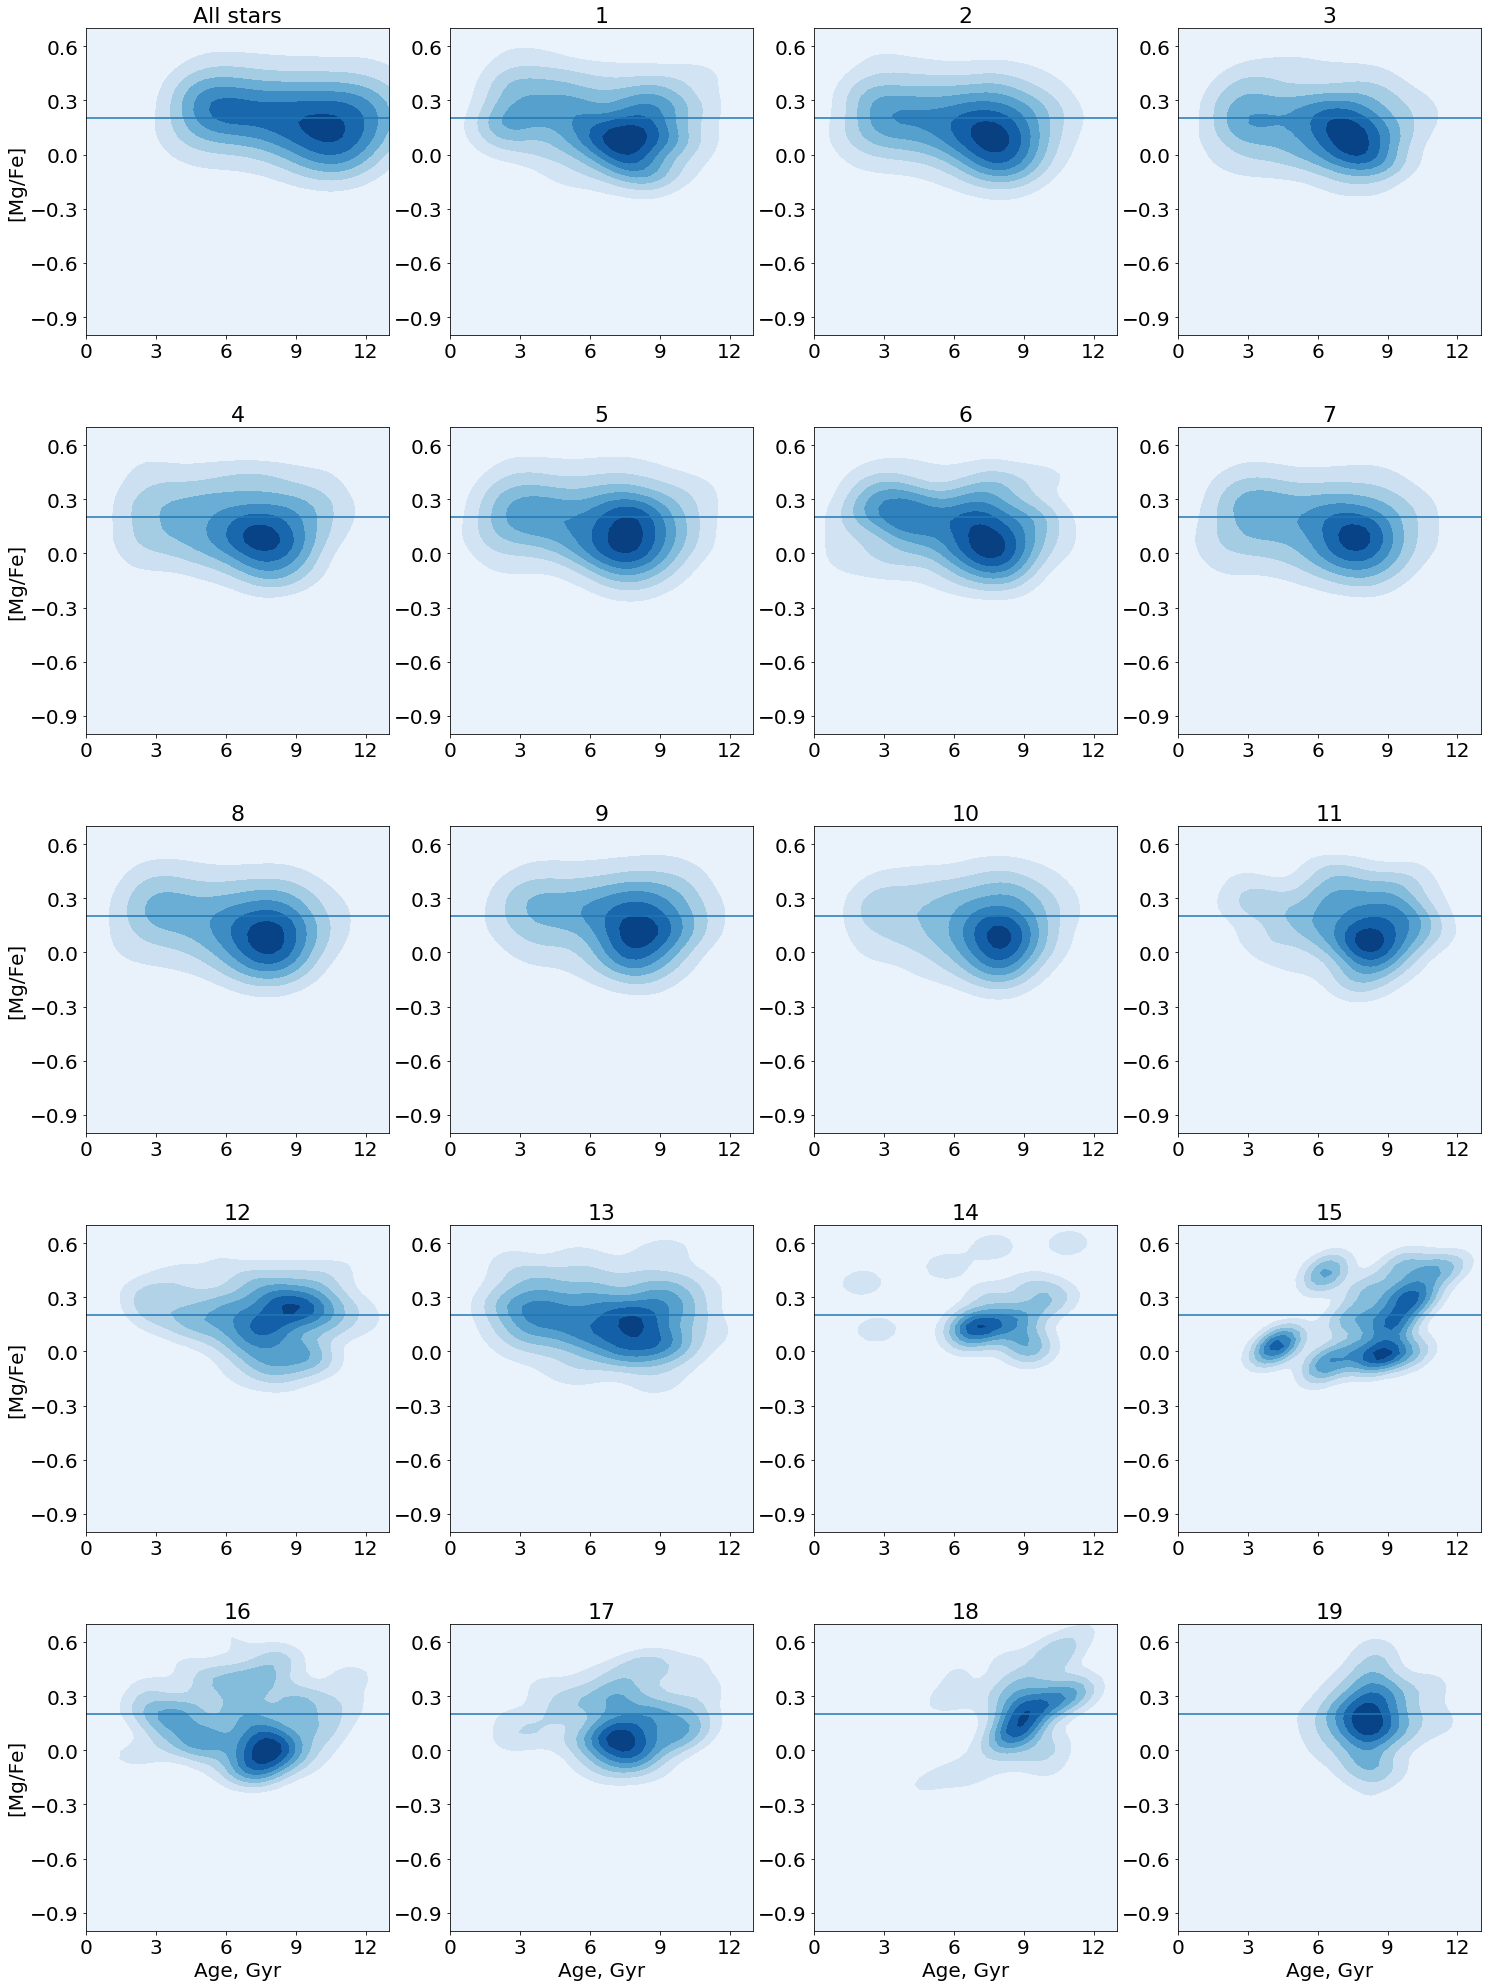

In [15]:
# Peform the kernel density estimate
fig, axs = plt.subplots(5,4, figsize=(25, 35), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()

ymin, ymax = -1.0, 0.8
xmin, xmax = 0, 14
bw_method = 0.35   #smoothing value
    
xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]  #our kde grid
positions = np.vstack([xx.ravel(), yy.ravel()])

k = 0

for i in list(myrange):
      Mg      = (data_groups.iloc[:,i+4]).values
      Fe      = (data_groups.iloc[:,i+5]).values 
      age     = (data_groups.iloc[:,i+6]).values /1e9
          
      Mg = Mg[~np.isnan(Mg)]
      Fe = Fe[~np.isnan(Fe)]
      age = age[~np.isnan(age)]

      values = np.vstack([age, (Mg-Fe-0.2)])
      kernel = st.gaussian_kde(values, bw_method=bw_method) #kde itself
        
      f = np.reshape(kernel(positions).T, xx.shape) 
      cfset = axs[num[k]].contourf(xx, yy, f, cmap='Blues')
         
      axs[k+1].set_title(str(k+1), fontsize=22)
      axs[k+1].xaxis.set_ticks([0, 3, 6, 9, 12])
      axs[k+1].yaxis.set_ticks([-0.9,-0.6,-0.3,0,0.3,0.6])  
      axs[k+1].tick_params(labelsize=20)
      axs[k+1].set_ylim(-1.0,0.7)
      axs[k+1].set_xlim(0,13) 
      axs[k+1].axhline(y=0.2)
       
        
      k = k + 1

values = np.vstack([agee, (Mgg-Fee-0.4)])
kernel = st.gaussian_kde(values, bw_method=bw_method)  
f = np.reshape(kernel(positions).T, xx.shape) 
cfset = axs[0].contourf(xx, yy, f, cmap='Blues')    
axs[0].axhline(y=0.2)
axs[0].xaxis.set_ticks([0, 3, 6, 9, 12])
axs[0].yaxis.set_ticks([-0.9,-0.6,-0.3,0,0.3,0.6])  
axs[0].set_title('All stars', fontsize=22)  
axs[0].tick_params(labelsize=20)
axs[0].set_ylim(-1.0,0.7)
axs[0].set_xlim(0,13)
        
axs[16].set_xlabel(r'Age, Gyr', fontsize=20)
axs[17].set_xlabel(r'Age, Gyr', fontsize=20)
axs[18].set_xlabel(r'Age, Gyr', fontsize=20)
axs[19].set_xlabel(r'Age, Gyr', fontsize=20)

axs[0].set_ylabel(r'[Mg/Fe]', fontsize=20)  
axs[4].set_ylabel(r'[Mg/Fe]', fontsize=20) 
axs[8].set_ylabel(r'[Mg/Fe]', fontsize=20) 
axs[12].set_ylabel(r'[Mg/Fe]', fontsize=20) 
axs[16].set_ylabel(r'[Mg/Fe]', fontsize=20) 

plt.savefig("Mg_Fe_age.pdf", dpi=1500)        

Brief conclusion: Velocity distribution in the Solar neighbourhood is inhomogeneous. Stars within kinematic groups show features of different stellar population, thus, at least excluding a possibility of being a moving group (open cluster remnant).